# Regresión con Red Neuronal Profunda - Ejemplo


En esta práctica se aplicará una red neuronal profunda con [TensorFlow](https://www.tensorflow.org/) (en particular, [Keras](https://www.tensorflow.org/api_docs/python/tf/keras/)) a un conjunto de datos de jugadores del video juego FIFA 19. Los datos utilizados son un subconjunto modificado de [este set de datos](https://www.kaggle.com/karangadiya/fifa19) y se encuentran en el archivo `FIFA 19 players.csv`. La tarea a realizar consiste en predecir el salario (wage) de los jugadores.

In [1]:
import pandas as pd

from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.decomposition import PCA

from tensorflow import keras

In [2]:
# Definamos el "random_state" para que los resultados sean reproducibles:
random_state=42

In [3]:
# Cambiemos la fuente de las gráficas de matplotlib:
plt.rc('font', family='serif', size=12)

## Preprocesamiento de datos

In [4]:
# Carguemos los datos:
data = pd.read_csv('./FIFA 19 players.csv', header=0)
data

,Name,Age,Overall,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,LS,ST,...,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
0,L. Messi,31,94,565000,Left,5.0,4.0,4.0,90.0,90.0,...,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0
1,Cristiano Ronaldo,33,94,405000,Right,5.0,4.0,5.0,94.0,94.0,...,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0
2,Neymar Jr,26,92,290000,Right,5.0,5.0,5.0,87.0,87.0,...,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0
3,K. De Bruyne,27,91,355000,Right,4.0,5.0,4.0,85.0,85.0,...,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0
4,E. Hazard,27,91,340000,Right,4.0,4.0,4.0,86.0,86.0,...,80.0,54.0,41.0,87.0,89.0,86.0,91.0,34.0,27.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15921,J. Lundstram,19,47,1000,Right,1.0,2.0,2.0,44.0,44.0,...,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0
15922,N. Christoffersson,19,47,1000,Right,1.0,2.0,2.0,47.0,47.0,...,42.0,47.0,16.0,46.0,33.0,43.0,42.0,22.0,15.0,19.0
15923,B. Worman,16,47,1000,Right,1.0,3.0,2.0,47.0,47.0,...,45.0,32.0,15.0,48.0,43.0,55.0,41.0,32.0,13.0,11.0
15924,D. Walker-Rice,17,47,1000,Right,1.0,3.0,2.0,49.0,49.0,...,34.0,33.0,22.0,44.0,47.0,50.0,46.0,20.0,25.0,27.0


In [5]:
# Veamos la descripción del dataset:
data.describe(include='all')

,Name,Age,Overall,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,LS,ST,...,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
count,15926,15926.000000,15926.000000,15926.000000,15926,15926.000000,15926.000000,15926.000000,15926.000000,15926.000000,...,15926.000000,15926.000000,15926.000000,15926.000000,15926.000000,15926.000000,15926.00000,15926.000000,15926.000000,15926.000000
unique,15114,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,J. Rodríguez,NaN,NaN,NaN,Right,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,9,NaN,NaN,NaN,11969,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,24.991209,66.446189,10254.866256,NaN,1.116037,3.004081,2.533342,59.842647,59.842647,...,51.446126,59.575411,50.401168,54.844405,55.494726,52.118234,60.34654,51.273703,51.883021,49.593118
std,NaN,4.552866,6.809244,22692.769542,NaN,0.397762,0.636845,0.618186,9.141407,9.141407,...,15.718376,14.432944,18.797738,14.665434,12.897478,12.501841,10.14202,17.198926,19.161875,19.162508
min,NaN,16.000000,46.000000,1000.000000,NaN,1.000000,1.000000,2.000000,33.000000,33.000000,...,11.000000,13.000000,10.000000,11.000000,12.000000,12.000000,29.00000,10.000000,10.000000,10.000000
25%,NaN,21.000000,62.000000,1000.000000,NaN,1.000000,3.000000,2.000000,54.000000,54.000000,...,40.000000,50.000000,34.000000,46.000000,47.000000,42.000000,53.00000,37.000000,35.000000,32.000000
50%,NaN,25.000000,66.000000,3000.000000,NaN,1.000000,3.000000,2.000000,60.000000,60.000000,...,54.000000,61.000000,56.000000,57.000000,57.000000,52.000000,61.00000,56.000000,59.000000,56.000000
75%,NaN,28.000000,71.000000,10000.000000,NaN,1.000000,3.000000,3.000000,66.000000,66.000000,...,64.000000,70.000000,65.000000,65.000000,65.000000,61.000000,68.00000,65.000000,67.000000,65.000000


In [6]:
# Obtengamos la distribución de valores de la variable `Preferred Foot`:
data['Preferred Foot'].value_counts()

Right    11969
Left      3957
Name: Preferred Foot, dtype: int64

In [7]:
# Convirtamos la columna `Preferred Foot` en binara con 0 -> pie derecho, 1 -> pie izquierdo:
data.loc[:, 'Preferred Foot'] = data['Preferred Foot'].map({'Right': 0, 'Left': 1})
data

,Name,Age,Overall,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,LS,ST,...,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
0,L. Messi,31,94,565000,1,5.0,4.0,4.0,90.0,90.0,...,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0
1,Cristiano Ronaldo,33,94,405000,0,5.0,4.0,5.0,94.0,94.0,...,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0
2,Neymar Jr,26,92,290000,0,5.0,5.0,5.0,87.0,87.0,...,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0
3,K. De Bruyne,27,91,355000,0,4.0,5.0,4.0,85.0,85.0,...,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0
4,E. Hazard,27,91,340000,0,4.0,4.0,4.0,86.0,86.0,...,80.0,54.0,41.0,87.0,89.0,86.0,91.0,34.0,27.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15921,J. Lundstram,19,47,1000,0,1.0,2.0,2.0,44.0,44.0,...,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0
15922,N. Christoffersson,19,47,1000,0,1.0,2.0,2.0,47.0,47.0,...,42.0,47.0,16.0,46.0,33.0,43.0,42.0,22.0,15.0,19.0
15923,B. Worman,16,47,1000,0,1.0,3.0,2.0,47.0,47.0,...,45.0,32.0,15.0,48.0,43.0,55.0,41.0,32.0,13.0,11.0
15924,D. Walker-Rice,17,47,1000,0,1.0,3.0,2.0,49.0,49.0,...,34.0,33.0,22.0,44.0,47.0,50.0,46.0,20.0,25.0,27.0


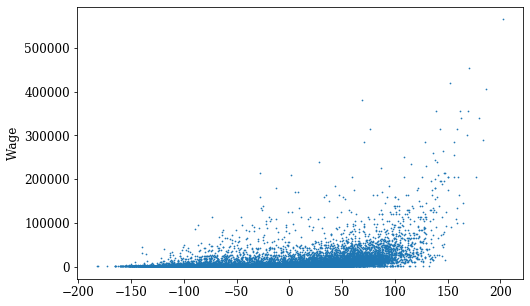

In [8]:
# Visualicemos los datos reducidos a dos dimensiones:

data.reset_index(drop=True, inplace=True)

pca = PCA(1)
z = pca.fit_transform(data.drop(columns=['Name', 'Wage']))

fig, ax = plt.subplots()
ax.scatter(z, data['Wage'], s=0.5)
ax.set_ylabel('Wage')
fig.set_size_inches(1.6*5, 5)

## Regresión

**Nota:** Dejaremos la coulmna `Name` en el datafrme, pero la excluiremos al definir las variables `X_train`, `y_train`, `X_val`, `y_val`, `X_test`, and `y_test`.

In [9]:
# Separemos los datos en conjuntos de entrenamiento (70 %), validación (15 %) y prueba (15 %):

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(columns=['Name', 'Wage']),
    data['Wage'],
    test_size=0.3,
    random_state=random_state
)

X_val, X_test, y_val, y_test = train_test_split(
    X_test,
    y_test,
    test_size=0.5,
    random_state=random_state
)

In [10]:
# Definamos un modelo secuencial de Keras:
model = keras.Sequential([
    keras.layers.BatchNormalization(input_shape=(61,)),
    keras.layers.Dense(16, activation='tanh'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(8, activation='tanh', kernel_regularizer=keras.regularizers.L2(1)),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(8, activation='tanh', kernel_regularizer=keras.regularizers.L2(1)),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(1),
])

In [11]:
# Veamos la descripción del modelo:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 61)                244       
_________________________________________________________________
dense (Dense)                (None, 16)                992       
_________________________________________________________________
batch_normalization_1 (Batch (None, 16)                64        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
batch_normalization_2 (Batch (None, 8)                 32        
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 72        
_________________________________________________________________
batch_normalization_3 (Batch (None, 8)                 3

In [12]:
# Compilemos el modelo con una función de pérdida, un optimizador y el MAE como
# una métrica a seguir:
model.compile(
    loss='mse',
    optimizer=keras.optimizers.Adam(learning_rate=0.01),
    metrics=['mae']
)

In [13]:
%%time
# Entrenemos el modelo:
model.fit(
    X_train, y_train,
    epochs=500,
    batch_size=1024,
    validation_data=(X_val, y_val),
    validation_batch_size=len(X_val)
)

Epoch 1/500
11/11 [==============================] - 0s 22ms/step - loss: 607517056.0000 - mae: 10193.3799 - val_loss: 692405696.0000 - val_mae: 10377.6582
Epoch 2/500
11/11 [==============================] - 0s 7ms/step - loss: 607453568.0000 - mae: 10192.8447 - val_loss: 692463168.0000 - val_mae: 10380.4795
Epoch 3/500
11/11 [==============================] - 0s 7ms/step - loss: 607376896.0000 - mae: 10192.0732 - val_loss: 692472448.0000 - val_mae: 10380.9531
Epoch 4/500
11/11 [==============================] - 0s 6ms/step - loss: 607267328.0000 - mae: 10190.9854 - val_loss: 692496448.0000 - val_mae: 10382.0420
Epoch 5/500
11/11 [==============================] - 0s 7ms/step - loss: 607133056.0000 - mae: 10189.5361 - val_loss: 692499008.0000 - val_mae: 10382.1875
Epoch 6/500
11/11 [==============================] - 0s 7ms/step - loss: 606983936.0000 - mae: 10187.6816 - val_loss: 692516096.0000 - val_mae: 10383.1133
Epoch 7/500
11/11 [==============================] - 0s 6ms/step - lo

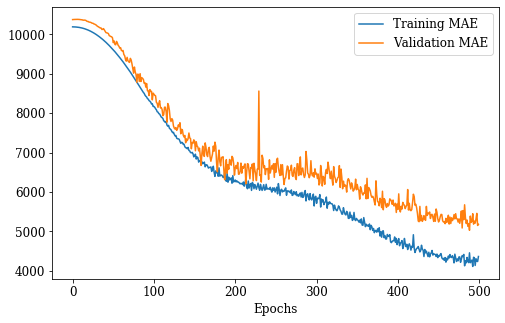

In [14]:
# Grafiquemos el MAE de entrenamiento y validación a lo largo de las épocas de
# entrenamiento:
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(model.history.history['mae'], label='Training MAE')
ax.plot(model.history.history['val_mae'], label='Validation MAE')
ax.set_xlabel('Epochs')
ax.legend()

In [15]:
# Obtengamos el R^2 y el MAE de entrenamiento, validación y prueba:
print(f'Training Data:')
print(f'R^2: {r2_score(y_train, model.predict(X_train))}')
print(f'MAE: {mean_absolute_error(y_train, model.predict(X_train))}')
print('')
print(f'Validation Data:')
print(f'R^2: {r2_score(y_val, model.predict(X_val))}')
print(f'MAE: {mean_absolute_error(y_val, model.predict(X_val))}')
print('')
print(f'Test Data:')
print(f'R^2: {r2_score(y_test, model.predict(X_test))}')
print(f'MAE: {mean_absolute_error(y_test, model.predict(X_test))}')

Training Data:
R^2: 0.8835909614530835
MAE: 4007.9113250940472

Validation Data:
R^2: 0.7448214844563881
MAE: 5178.696244046198

Test Data:
R^2: 0.6604539515047054
MAE: 5421.038058345215


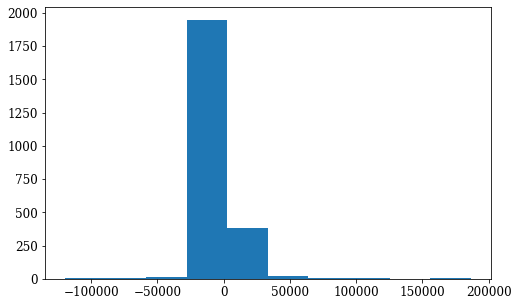

In [16]:
# Grafiquemos un histograma del error de predicción en el conjunto de prueba:
fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(y_test - model.predict(X_test).flatten());

In [17]:
# Veamos los datos junto con las predicciones:
pd.concat([
    data.drop(columns='Wage').reset_index(drop=True),
    data['Wage'].reset_index(drop=True),
    pd.DataFrame({'predicted_wage': model.predict(data.drop(columns=['Name', 'Wage'])).flatten()})
], axis=1)

,Name,Age,Overall,Preferred Foot,International Reputation,Weak Foot,Skill Moves,LS,ST,RS,...,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,Wage,predicted_wage
0,L. Messi,31,94,1,5.0,4.0,4.0,90.0,90.0,90.0,...,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,565000,366608.312500
1,Cristiano Ronaldo,33,94,0,5.0,4.0,5.0,94.0,94.0,94.0,...,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,405000,350791.593750
2,Neymar Jr,26,92,0,5.0,5.0,5.0,87.0,87.0,87.0,...,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,290000,244299.859375
3,K. De Bruyne,27,91,0,4.0,5.0,4.0,85.0,85.0,85.0,...,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,355000,316016.937500
4,E. Hazard,27,91,0,4.0,4.0,4.0,86.0,86.0,86.0,...,41.0,87.0,89.0,86.0,91.0,34.0,27.0,22.0,340000,291624.593750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15921,J. Lundstram,19,47,0,1.0,2.0,2.0,44.0,44.0,44.0,...,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0,1000,1796.261719
15922,N. Christoffersson,19,47,0,1.0,2.0,2.0,47.0,47.0,47.0,...,16.0,46.0,33.0,43.0,42.0,22.0,15.0,19.0,1000,1818.494141
15923,B. Worman,16,47,0,1.0,3.0,2.0,47.0,47.0,47.0,...,15.0,48.0,43.0,55.0,41.0,32.0,13.0,11.0,1000,1806.260498
15924,D. Walker-Rice,17,47,0,1.0,3.0,2.0,49.0,49.0,49.0,...,22.0,44.0,47.0,50.0,46.0,20.0,25.0,27.0,1000,1817.720093
